# Calculation of the critical temperature for 2D Ising models using Convolutional neural network

- critical temperature $\beta = 0.440686$
- 平均場近似により解析的に求めた$\beta$が, DeepLearningで計算したものと一致するか確かめる.
- このnotebookは次の論文の一部を実装したもの : Carrasquilla, J., Melko, R. Machine learning phases of matter. Nature Phys 13, 431–434 (2017). https://doi.org/10.1038/nphys4035

# データの前処理

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
print(tf.__version__) 


# Dataの前処理
################################################################
# 【Working in Progress】2-D IsingModelの画像データを準備してください.
# (画像データ, ターゲット(正解データ), beta)で1セットです.
# ターゲットは高温なら[1,0]を, 低温なら[0,1].
# 画像データはnpy, ターゲットはlist, betaはfloat.
# 各betaについて同じ枚数の画像を用意してください.
# メトロポリス法で生成可能です. 例えば次のライブラリで作れます : https://github.com/christianb93/MachineLearning.git
################################################################

nconf =  # 各betaの画像枚数
betacr = 0.440686 # 平均場近似で求めた相転移点

# Prepare your Data!
data = []  # 画像データ
labels = []  # target
betas = []  # betaの値の集まり.
nprm=  # betaの数. beta=0,5,10,...,100なら, nprm=21 

data = np.array(data)
labels = np.array(labels)

train_data=data[0::2]  # train_data = [data[0], data[2], ...]
train_labels=labels[0::2]
train_betas=betas[0::2]

test_data=data[1::2]
test_labels=labels[1::2]
test_betas=betas[1::2]

# Train

In [ ]:
tf.random.set_seed(52354)
model_CNN = keras.Sequential([
    keras.layers.Conv2D(filters =  1,
                        kernel_size=(4, 4), 
                        activation='relu', 
                        input_shape=(32, 32, 1) 
                        ),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model_CNN.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

train_data_cnn=np.array(train_data)
train_data_cnn = train_data_cnn.reshape(train_data.shape[0], train_data.shape[1], train_data.shape[2], 1)

In [ ]:
model_CNN.fit(train_data_cnn, train_labels, epochs=10)

Epoch 1/10
30/30 [==============================] - 0s 9ms/step - loss: 0.4084 - accuracy: 0.8053
Epoch 2/10
30/30 [==============================] - 0s 9ms/step - loss: 0.1618 - accuracy: 0.9789
Epoch 3/10
30/30 [==============================] - 0s 9ms/step - loss: 0.0630 - accuracy: 1.0000
Epoch 4/10
30/30 [==============================] - 0s 8ms/step - loss: 0.0442 - accuracy: 0.9989
Epoch 5/10
30/30 [==============================] - 0s 9ms/step - loss: 0.0208 - accuracy: 1.0000
Epoch 6/10
30/30 [==============================] - 0s 9ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 7/10
30/30 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 8/10
30/30 [==============================] - 0s 8ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 9/10
30/30 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 10/10
30/30 [==============================] - 0s 9ms/step - loss: 0.0045 - accuracy: 1.0000


# Test

0.9 4.724294e-05 0.9999527
0.85 5.3331452e-05 0.9999468
0.8 5.820123e-05 0.99994177
0.7 8.533801e-05 0.9999145
0.65 0.00013153494 0.99986833
0.6 0.00026019898 0.99973977
0.55 0.00084821106 0.9991518
0.5 0.008376382 0.99162364
0.47 0.025804238 0.9741957
0.42 0.96269906 0.037300967
0.4 0.9511653 0.048834678
0.35 0.97298384 0.027016189
0.3 0.9686726 0.03132741
0.25 0.956013 0.043986935
0.2 0.9604688 0.039531127
0.15 0.9660089 0.033991136
0.1 0.94452214 0.055477872
0.05 0.95157564 0.04842432
0.0 0.95175123 0.048248824


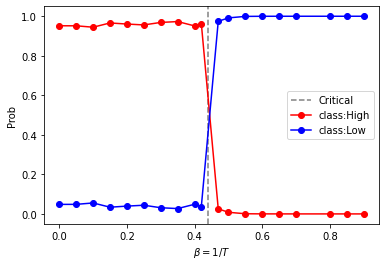

In [ ]:
xs=[]
y1s=[]
y2s=[]
Ndatamax = 950
Nsameclass = 50
for ii in range(0,Ndatamax,Nsameclass):
  res = model_CNN(test_data[ii:ii+Nsameclass])
  x = test_betas[ii]
  y1= np.mean(res.numpy().T[0] )
  y2=np.mean(res.numpy().T[1] )
  xs.append( x )
  y1s.append( y1 )
  y2s.append( y2 )
  print(x,y1,y2)
plt.axvline(x=0.440686, ymin=0, ymax=1, ls="dashed",color="gray",label="Critical")
plt.plot(xs,y1s,label="class:High",marker="o",color="red")
plt.plot(xs,y2s,label="class:Low",marker="o",color="blue")
plt.legend()
plt.xlabel(r"$\beta=1/T$")
plt.ylabel(r"Prob")
plt.show()

0.42 0.96269906
0.47 0.025804238
0.42 0.037300967
0.47 0.9741957
sol x,y =  [0.5        0.44469322]


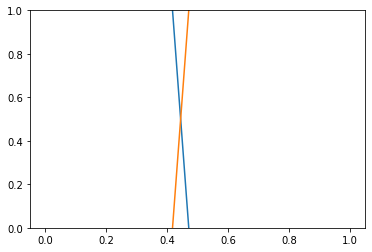

Relative error = 0.91 %


In [ ]:
u1,v1 = xs[9],y1s[9]
u2,v2 = xs[8],y1s[8]
w1,t1 = xs[9],y2s[9]
w2,t2 = xs[8],y2s[8]
print(u1,v1)
print(u2,v2)
#
print(w1,t1)
print(w2,t2)

from numpy.linalg import solve

tan1=(v2-v1)/(u2-u1)
tan2=(t2-t1)/(w2-w1)
MatA = [[1, -tan1],
        [1, -tan2]]
 
vecB = [v1-tan1*u1,
        t1-tan2*w1]
#
sol = solve(MatA, vecB)
print("sol x,y = ", sol)
#
xx = np.linspace(0,1)
yy = tan1*(xx-u1)+v1
plt.plot(xx,yy)
#
yy = tan2*(xx-w1)+t1
plt.plot(xx, yy)
plt.ylim(0,1)
plt.show()
#
beta_cr = 0.440686
er = round(abs(beta_cr - sol[1])/beta_cr  *100,2)
print(f"Relative error = {er} %")